In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-01-06 09:20:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-01-06 09:20:48 (9.00 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [2]:
import pandas as pd

df = pd.read_csv(
    'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
    parse_dates=['Date'],
    index_col=['Date']
    )
df


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
# how many samples 
len(df)

2787

In [6]:
# only want closing price
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


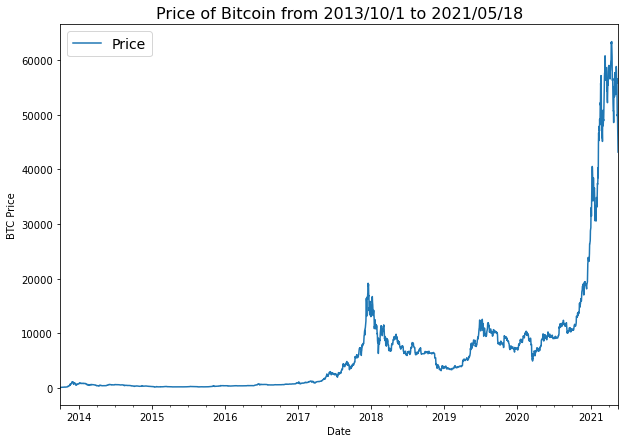

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 2013/10/1 to 2021/05/18', fontsize=16)
plt.legend(fontsize=14)

In [8]:
# import and format historical bitcoin data with python
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',') # read in the target csv
    next(csv_reader) # skip the columns tiltes
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
        btc_price.append(float(line[2]))

# view first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

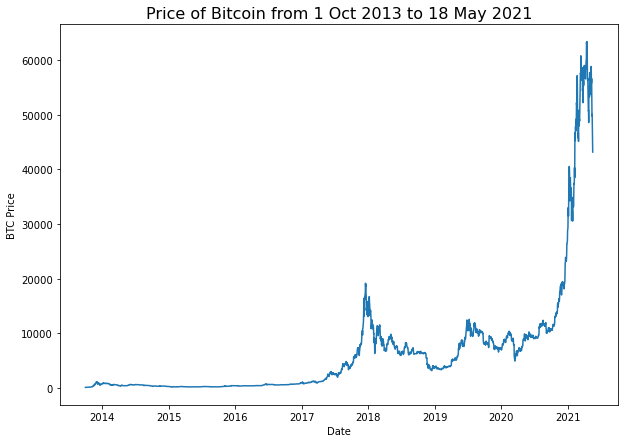

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [10]:
# Create train & test sets for time series (the wrong way)
# get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# wrong way to make train_test for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timesteps,
    prices,
    test_size=0.2,
    random_state=42
)
X_train, X_test, y_train, y_test

(array(['2015-05-23T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
        '2019-06-01T00:00:00.000000000', ...,
        '2016-11-04T00:00:00.000000000', '2017-04-17T00:00:00.000000000',
        '2016-02-08T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2019-06-11T00:00:00.000000000', '2021-05-03T00:00:00.000000000',
        '2017-10-05T00:00:00.000000000', '2019-06-22T00:00:00.000000000',
        '2019-07-21T00:00:00.000000000', '2014-02-19T00:00:00.000000000',
        '2020-06-08T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
        '2018-01-28T00:00:00.000000000', '2016-09-24T00:00:00.000000000',
        '2017-02-12T00:00:00.000000000', '2016-11-07T00:00:00.000000000',
        '2015-01-04T00:00:00.000000000', '2015-10-19T00:00:00.000000000',
        '2020-05-09T00:00:00.000000000', '2020-08-04T00:00:00.000000000',
        '2018-01-08T00:00:00.000000000', '2014-03-28T00:00:00.000000000',
        '2015-11-26T00:00:00.000000000', '2016-01-10T00:00:00.000000000',

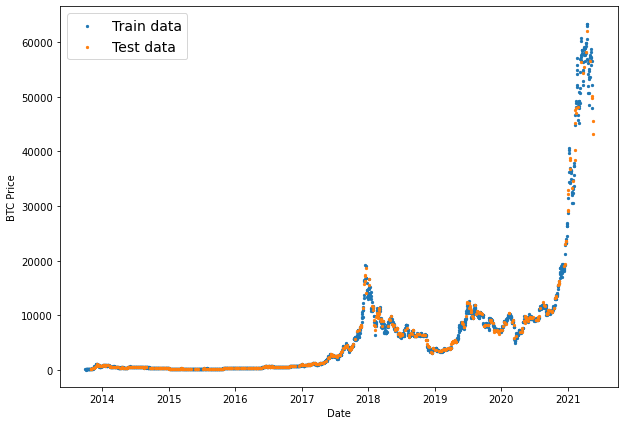

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)

In [13]:
# correct way
# create train and test splits
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

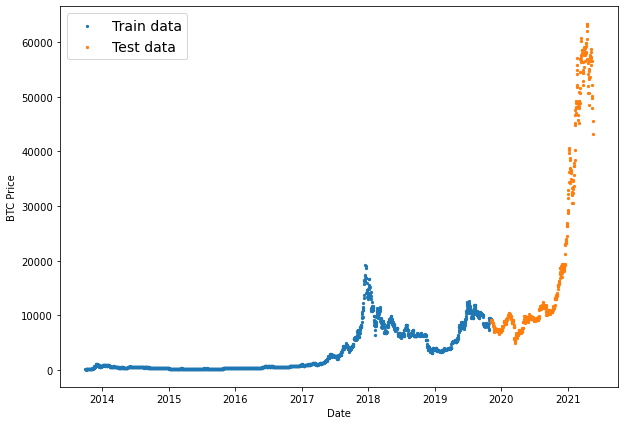

In [14]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

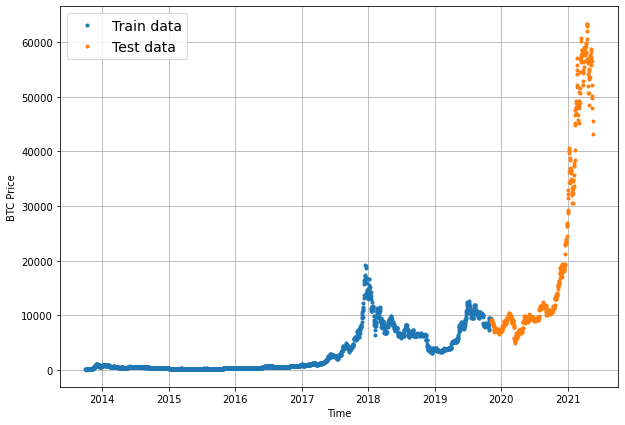

In [16]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [17]:
# create naive forcast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value

naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

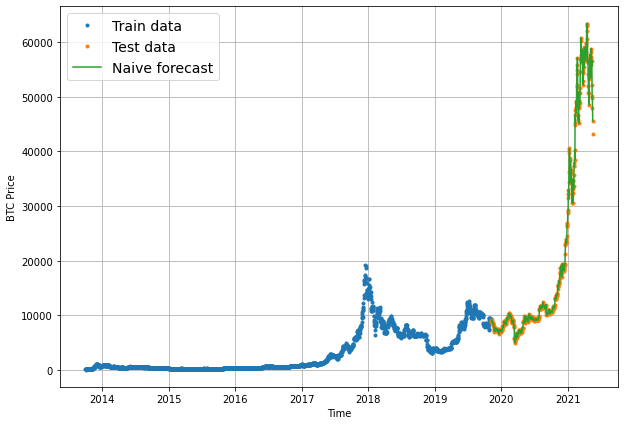

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

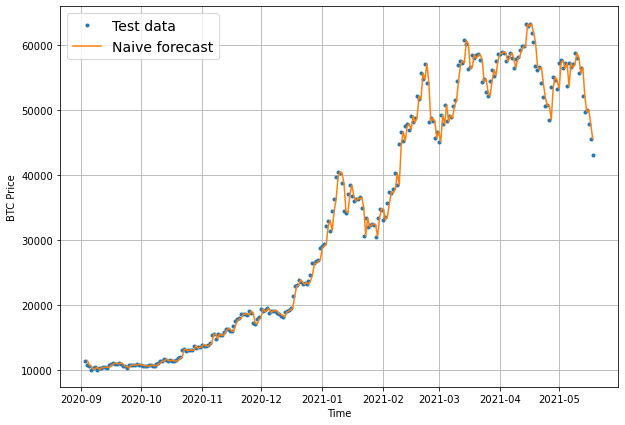

In [19]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [20]:

import tensorflow as tf

In [21]:
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # find mae of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))# our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
    # make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
        }

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-01-06 09:20:53.067152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-06 09:20:53.067508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957013}

In [24]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [25]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [26]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [27]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [30]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    turns a 1d arrary into a 2d array of sequential windows of window_size
    """
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. use numpy indexing to create a 2d array of multiple window steps (minus 1 to account for 0 indexing)
    window_indices = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T# create 2D array of windows of size window_size

    # 3. index on the target array (time series) with 2d array of multiple window steps
    windowed_array = x[window_indices]

    # 4. get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, HORIZON)

    return windows, labels


In [31]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [35]:
# make the train test split
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    split matching pairs of windows and labels into train and test splits
    """
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [36]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [37]:
import os

def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

In [38]:
# Model 1: Dense model (window = 7, horizon = 1)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)

model_1 = Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense') # give the model a name so we can save it

model_1.compile(
    loss='mae',
    optimizer=Adam(),
    metrics=['mae'] # we don't necessarily need this when the loss function is already mae
)

history_model_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[
        create_model_checkpoint(model_name=model_1.name)
    ]
)

2022-01-06 10:31:42.510870: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-06 10:31:42.513099: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-06 10:31:42.628843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 2205.2935 - mae: 2205.2935 - val_loss: 4260.3135 - val_mae: 4260.3135


2022-01-06 10:31:43.081645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-06 10:31:43.218278: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 376.4335 - mae: 376.4335 - val_loss: 1233.7546 - val_mae: 1233.7546
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 240.4698 - mae: 240.4698 - val_loss: 1238.3033 - val_mae: 1238.3033
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 220.6290 - mae: 220.6290 - val_loss: 1171.8973 - val_mae: 1171.8973
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 207.8196 - mae: 207.8196 - val_loss: 1140.5315 - val_mae: 1140.5315
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 203.6880 - mae: 203.6880 - val_loss: 1111.6925 - val_mae: 1111.6925

In [39]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 630.7455 - mae: 630.7455


[630.7455444335938, 630.7455444335938]

In [40]:
model_1_best = tf.keras.models.load_model('model_experiments/model_1_dense')
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 572.1852 - mae: 572.1852


2022-01-06 10:36:15.775642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[572.1851806640625, 572.1851806640625]

In [41]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [42]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

2022-01-06 10:37:47.333667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8734.346 , 8660.023 , 8871.29  , 8700.631 , 8659.381 , 8556.1455,
        8569.857 , 8435.032 , 8322.172 , 8401.834 ], dtype=float32)>)

In [43]:
# evaluate preds
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 630.74554,
 'mse': 1285839.9,
 'rmse': 1133.9489,
 'mape': 2.8817205,
 'mase': 1.108045}

In [44]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957013}

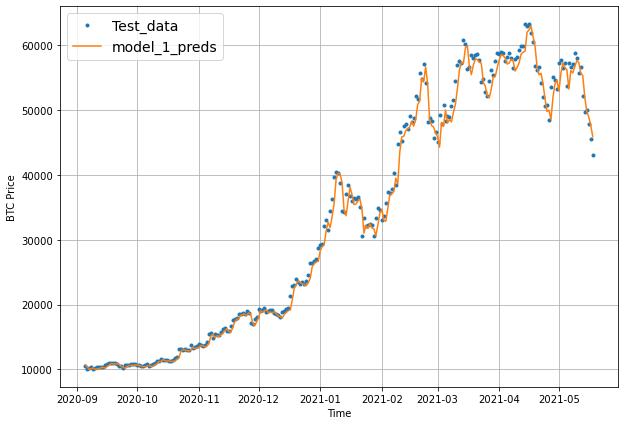

In [46]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")
plt.show()

In [47]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [48]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [49]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [50]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 2253.9216 - val_loss: 4826.3960


2022-01-06 10:45:39.071259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-06 10:45:39.235000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 569.4586 - val_loss: 2090.7456
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 360.7395 - val_loss: 1580.6119
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 291.1969 - val_loss: 1466.3127
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 242.1559 - val_loss: 1217.0135
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 209.0414 - val_loss: 1117.6663
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 7/100
18/18 [=================

In [51]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 821.0306


821.0306396484375

In [52]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 625.4219


2022-01-06 10:46:21.646404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625.421875

In [53]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

2022-01-06 10:46:58.650398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [54]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 625.4219,
 'mse': 1363732.4,
 'rmse': 1167.7896,
 'mape': 2.8579657,
 'mase': 1.0932436}

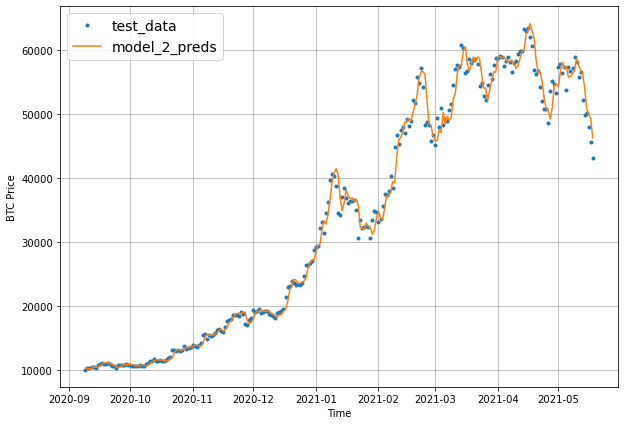

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [56]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

2022-01-06 10:48:06.302602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


2022-01-06 10:48:06.739258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [59]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1374.5328


1374.5328369140625

In [60]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1225.4905


2022-01-06 10:48:37.556359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1225.490478515625

In [61]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

2022-01-06 10:49:51.112183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9378.794, 9339.586, 9366.604, 9516.721, 9672.826, 9522.893,
        9246.671],
       [8986.961, 9045.763, 9208.02 , 9267.137, 9184.421, 9193.128,
        8978.976],
       [8866.171, 8886.351, 9106.444, 9227.414, 8970.144, 9102.565,
        9041.343],
       [8847.427, 9079.423, 9206.414, 9331.261, 9138.323, 9194.868,
        9356.561],
       [8856.718, 9089.114, 9038.877, 9226.445, 9319.382, 9067.035,
        9052.878]], dtype=float32)>

In [62]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 641.6556  ,  382.3517  ,  385.77917 ,  538.30206 ,  538.57355 ,
         474.17    ,  434.03964 ,  534.831   ,  602.7869  ,  631.916   ,
         763.24634 ,  738.2206  ,  893.574   ,  886.4253  ,  592.3265  ,
         300.97336 ,  187.21213 ,  274.98083 ,  296.8363  ,  285.17636 ,
         142.75851 ,  190.57437 ,  310.9161  ,  425.30325 ,  217.36642 ,
         119.55002 ,   95.45871 ,  157.99707 ,  163.45572 ,  184.03482 ,
         318.51007 ,  438.29187 ,  388.05777 ,  439.95468 ,  338.83456 ,
         331.9752  ,  353.03113 ,  270.37976 ,  235.71848 ,  200.89008 ,
         446.1378  ,   60.579662,   36.411552,  101.842705,  149.04633 ,
         110.20676 ,  101.51186 ,  103.449715,  134.39551 ,  104.63868 ,
         156.36656 ,  201.84605 ,  193.21848 ,  215.91045 ,  264.34747 ,
         317.71396 ,  447.06058 ,  470.7018  ,  447.31732 ,  490.91324 ,
         390.76712 ,  191.0192  ,  294.902   ,  331.66547 ,  379.99612 ,
         422.2252  ,  426.89777 ,  436.85843

In [63]:
def evaluate_preds(y_true, y_pred):
    # make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [64]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1225.4904,
 'mse': 5279956.0,
 'rmse': 1411.9243,
 'mape': 5.5432987,
 'mase': 2.1806912}

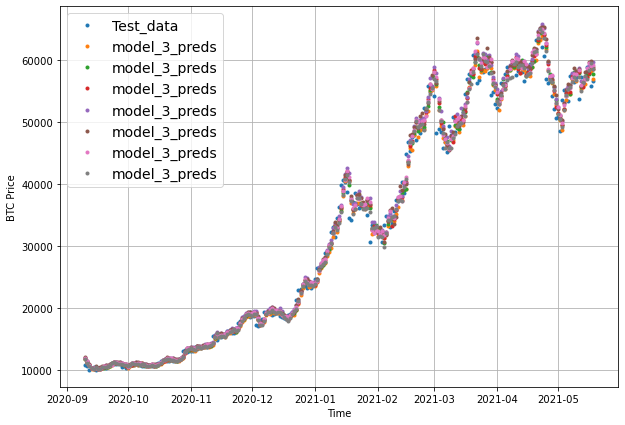

In [65]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

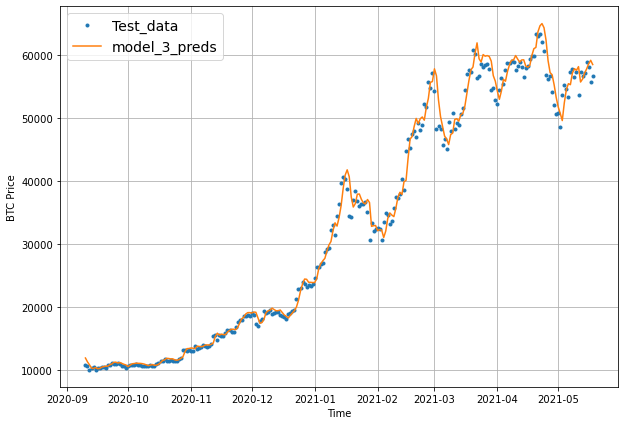

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

<AxesSubplot:>

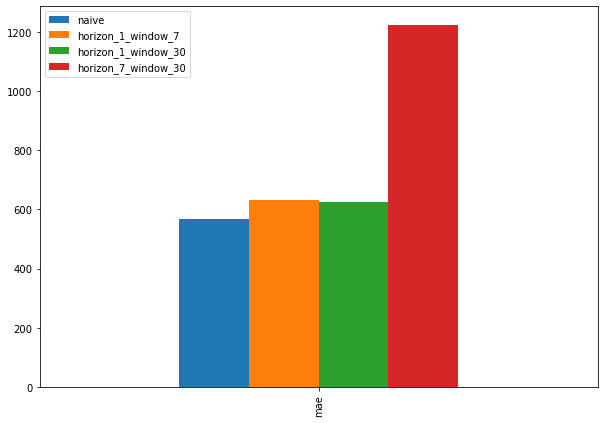

In [67]:
pd.DataFrame({
    'naive': naive_results['mae'],
    'horizon_1_window_7': model_1_results['mae'],
    'horizon_1_window_30':model_2_results['mae'],
    'horizon_7_window_30': model_3_results['mae']
}, index=['mae']).plot(figsize=(10, 7), kind='bar')

In [68]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [69]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [70]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [71]:
# The Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim).
train_windows[0].shape

(7,)

In [72]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [73]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [74]:
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [75]:
tf.random.set_seed(42)

model_4 = Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    # causal padding is used here for temporal data
    layers.Conv1D(128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_4_conv1d')

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

2022-01-06 15:47:17.546796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-06 15:47:18.386569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets wr

In [76]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 576.0400


2022-01-06 15:48:27.516699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


576.0399780273438

In [78]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

2022-01-06 15:48:45.140898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8921.313, 8808.042, 9005.412, 8787.554, 8759.978, 8765.352,
       8695.999, 8535.354, 8492.437, 8525.032], dtype=float32)>

In [79]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 576.04004,
 'mse': 1198075.0,
 'rmse': 1094.5662,
 'mape': 2.5755417,
 'mase': 1.0119426}

In [80]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 576.04004,
 'mse': 1198075.0,
 'rmse': 1094.5662,
 'mape': 2.5755417,
 'mase': 1.0119426}

In [81]:
# model_4 lstm
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_lstm')

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100


2022-01-06 15:57:43.176890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 20ms/step - loss: 2125.5693 - val_loss: 7891.5137


2022-01-06 15:57:43.748574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 505.8715 - val_loss: 1541.1288
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 214.7264 - val_loss: 1047.2064
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 192.2347 - val_loss: 1046.4513
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 186.3115 - val_loss: 1040.8890
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 189.5325 - val_loss: 1022.1036
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
Epoch 7/100
18/18 [==================

In [82]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

10/18 [===============>..............] - ETA: 0s - loss: 197.4883

2022-01-06 15:58:57.699369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 10ms/step - loss: 577.3120


577.3119506835938

In [83]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

2022-01-06 15:59:11.067986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8893.505, 8806.707, 8987.877, 8777.296, 8782.97 , 8751.259,
       8644.439, 8565.746, 8468.762, 8510.66 ], dtype=float32)>

In [84]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 577.31195,
 'mse': 1198690.1,
 'rmse': 1094.847,
 'mape': 2.583222,
 'mase': 1.014177}

In [85]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [86]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [89]:
# create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2414)

In [93]:
# add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# add in block_reward values as a feature to dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [94]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<AxesSubplot:xlabel='Date'>

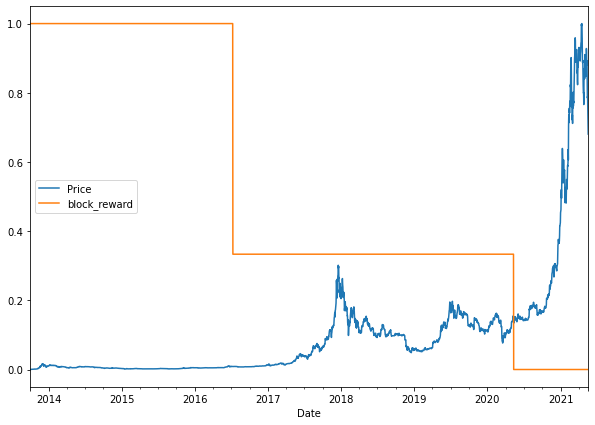

In [95]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)

scaled_price_block_df.plot(figsize=(10, 7))


In [96]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [97]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE): #shift values for each step in window_size
    bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]

In [98]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [99]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [100]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [101]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

2022-01-06 17:04:46.915775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


2022-01-06 17:04:47.195009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_ex

In [102]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 7ms/step - loss: 575.1056


2022-01-06 17:40:41.920325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


575.1055908203125

In [103]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

2022-01-06 17:40:51.240927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.984, 8744.623, 9042.865, 8770.909, 8693.962, 8765.545,
       8660.003, 8508.439, 8446.999, 8524.125], dtype=float32)>

In [104]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 575.10565,
 'mse': 1183214.5,
 'rmse': 1087.7567,
 'mape': 2.5910635,
 'mase': 1.0103011}

In [105]:
# create NBeatsBlock custom layer
from tensorflow.keras.layers import Layer
from tensorflow.keras import layers
class NBeatsBlock(Layer):
    def __init__(
        self,
        input_size: int,
        theta_size: int,
        horizon: int,
        n_neurons: int,
        n_layers: int,
        **kwargs
        ):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # block contains stacks of 4 fully connected layers each has ReLu activation
        self.hidden = [layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        # output of block is a theta layer with linear activation
        self.theta_layer = layers.Dense(theta_size, activation='linear', name='theta')

    def call(self, inputs): # the call method is what runs when the layer is called
        x = inputs
        for layer in self.hidden: # pass through each hidden layer
            x = layer(x)
        theta = self.theta_layer(x)
        # output the backcast and forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast


In [106]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(
    input_size=WINDOW_SIZE,
    theta_size=WINDOW_SIZE + HORIZON, # backcast + forecast
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4
)

In [108]:
# create dummy inputs (have to be the same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [109]:
# pass dummy inputs to dummy NBeatBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.8397282   0.59332156 -0.19901744 -0.02843323  0.579695    0.8141114
 -1.2566788 ]
Forecast: 0.15958595275878906


In [110]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [111]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [112]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [113]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [114]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

In [115]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [118]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
tf.random.set_seed(42)

# 1. setup and instance of NBeats Block
nbeats_block_layer = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name='initial_block'
    )

# 2. create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): 
    # 5. use the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass the residuals

    # 6. create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f'substract_{i}')
    forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

# 7. put the stack model together
model_7 = tf.keras.Model(
    inputs=stack_input,
    outputs=forecast,
    name='model_7_NBeats'
)

# 8. compile model with mae loss
model_7.compile(
    loss='mae',
    optimizer=Adam()
)

# 9. fit the model with EarlyStopping and ReduceLROnPlateau callbacks
history_model_7 = model_7.fit(
    train_dataset,
    epochs=N_EPOCHS,
    validation_data=test_dataset,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=200,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            patience=100,
            verbose=1
        )
    ]
)

Epoch 1/5000


2022-01-06 23:33:52.595472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 873.5189

2022-01-06 23:33:58.424285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 9s 2s/step - loss: 873.5189 - val_loss: 16748.6074
Epoch 2/5000
3/3 [==============================] - 1s 162ms/step - loss: 2043.8058 - val_loss: 16808.2891
Epoch 3/5000
3/3 [==============================] - 1s 187ms/step - loss: 3109.0732 - val_loss: 16462.9512
Epoch 4/5000
3/3 [==============================] - 0s 181ms/step - loss: 2112.8953 - val_loss: 6685.2153
Epoch 5/5000
3/3 [==============================] - 0s 122ms/step - loss: 3263.7429 - val_loss: 3152.1565
Epoch 6/5000
3/3 [==============================] - 0s 100ms/step - loss: 532.9554 - val_loss: 1485.3165
Epoch 7/5000
3/3 [==============================] - 0s 126ms/step - loss: 637.0403 - val_loss: 4954.3408
Epoch 8/5000
3/3 [==============================] - 0s 92ms/step - loss: 1242.5806 - val_loss: 7302.1528
Epoch 9/5000
3/3 [==============================] - 0s 93ms/step - loss: 695.7053 - val_loss: 1597.7512
Epoch 10/5000
3/3 [==============================] - 0s 121ms/ste

In [119]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 32ms/step - loss: 573.2046


573.20458984375

In [120]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

2022-01-06 23:41:51.689248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8826.079, 8779.995, 9066.057, 8741.102, 8748.98 , 8774.238,
       8647.08 , 8499.746, 8485.111, 8525.581], dtype=float32)>

In [121]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.2046,
 'mse': 1153509.0,
 'rmse': 1074.0154,
 'mape': 2.6069942,
 'mase': 1.0069615}

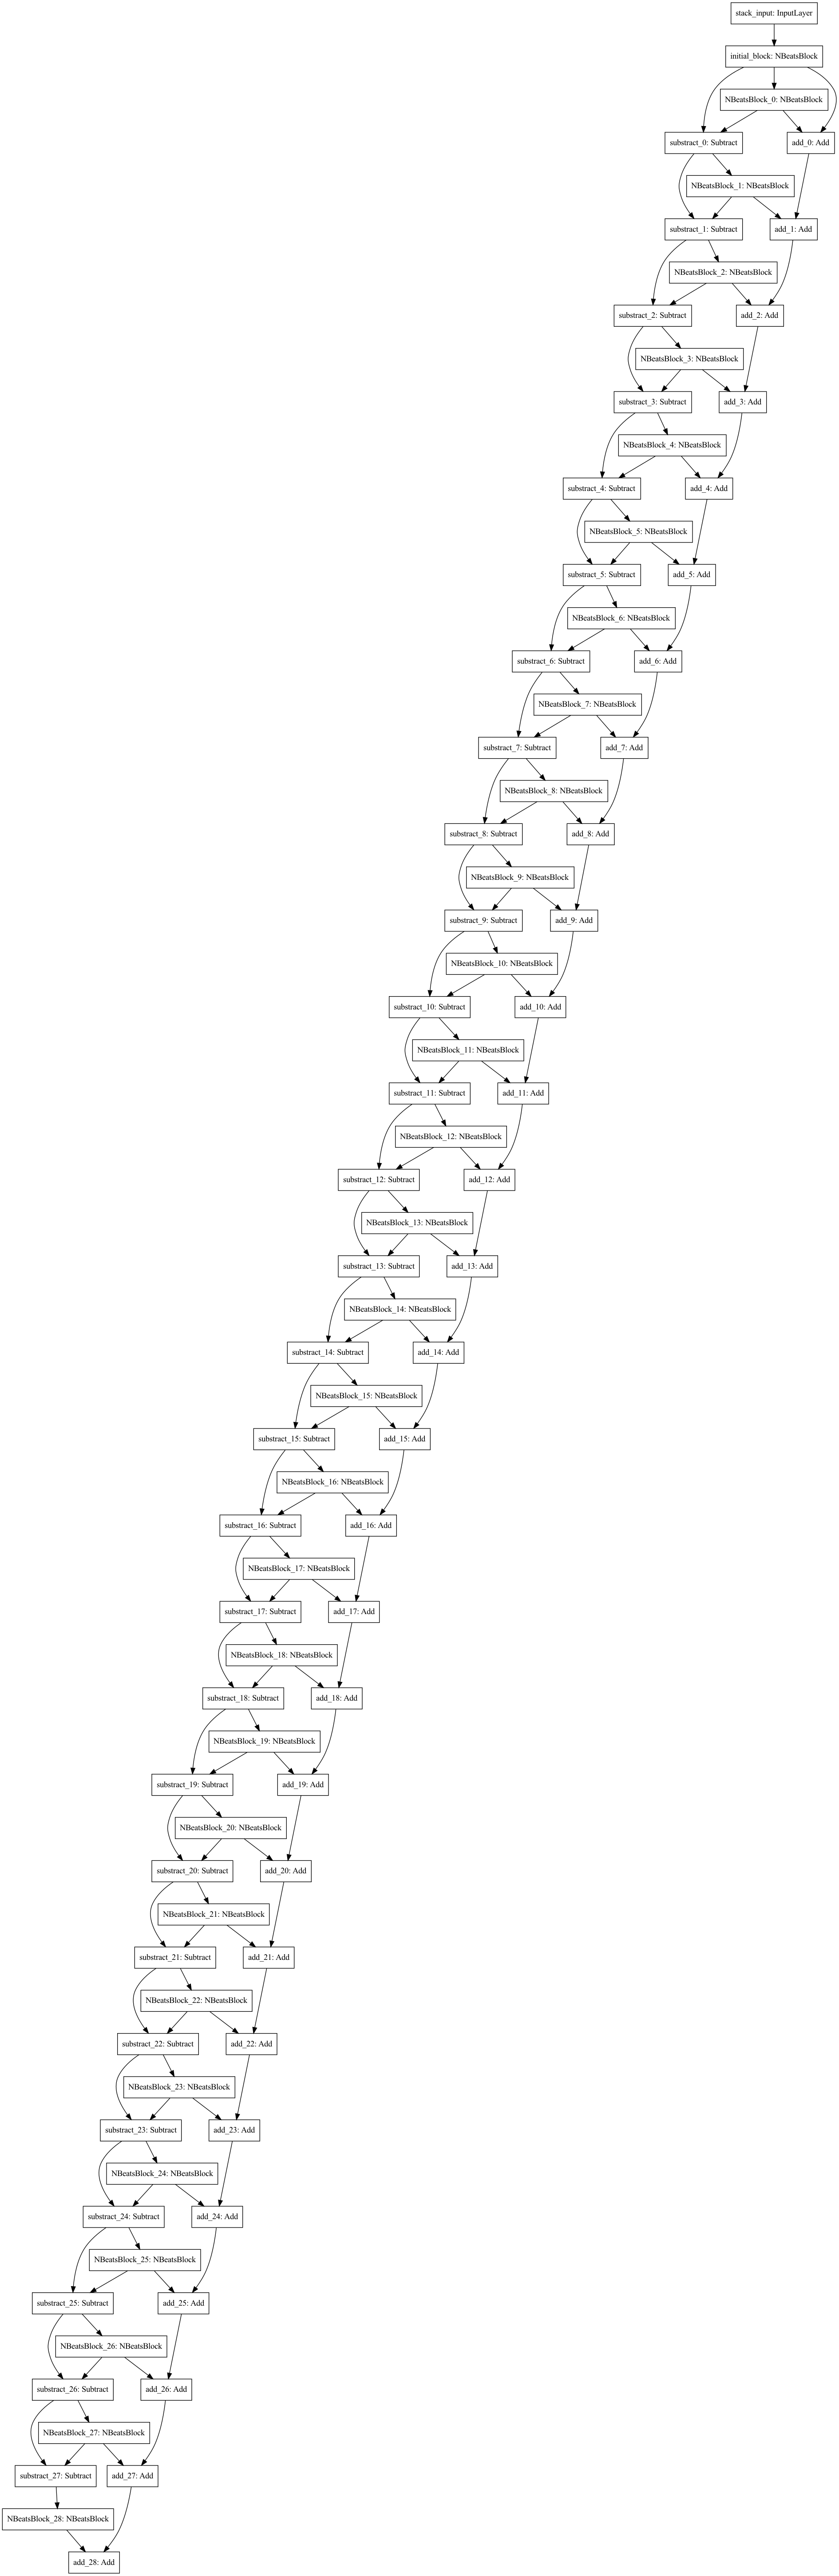

In [122]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [123]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

INFO:tensorflow:Assets written to: model_7_NBeats/assets


INFO:tensorflow:Assets written to: model_7_NBeats/assets
/Users/skyler/miniforge3/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [126]:
# ensemble model

def get_ensemble_models(
    horizon=HORIZON,
    train_data=train_dataset,
    test_data=test_dataset,
    num_iter=10,
    num_epochs=100,
    loss_fns=['mae', 'mse', 'mape']):
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

    For example, if num_iter=10, a list of 30 trained models will be returned:
    10 * len(["mae", "mse", "mape"]).
    """
    # make empty list for trained ensemble models
    ensemble_models = []

    # create num_iter number of models per loss function
    for i in range(num_iter):
        # build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

            # construct a simple model (similar to model_1)
            model = Sequential([
                # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
                # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON)
            ])

            # Compile simple model with current loss function
            model.compile(
                loss=loss_function,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"]
                )
            
            # fit model
            model.fit(
                train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[
                    EarlyStopping(
                        monitor='val_loss',
                        patience=200,
                        restore_best_weights=True
                    ),
                    ReduceLROnPlateau(
                        monitor='val_loss',
                        patience=100,
                        verbose=1
                    )
                ]
            )

            # append fitted model to list of ensemble models
            ensemble_models.append(model)

    return ensemble_models

In [127]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

optimizing model by reducing: mae for 1000 epochs, model number: 0


2022-01-07 09:41:18.418902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:41:18.721177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00614: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00981: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mse for 1000 epochs, model number: 0


2022-01-07 09:41:47.945346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:41:48.301987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00477: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00577: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for 1000 epochs, model number: 0


2022-01-07 09:42:05.667748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:42:06.066430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00218: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00353: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00453: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing: mae for 1000 epochs, model number: 1


2022-01-07 09:42:20.451619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:42:20.772143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00746: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing: mse for 1000 epochs, model number: 1


2022-01-07 09:42:50.217133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:42:50.546039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00765: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00865: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for 1000 epochs, model number: 1


2022-01-07 09:43:17.263034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:43:17.707568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00166: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00399: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00499: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing: mae for 1000 epochs, model number: 2


2022-01-07 09:43:33.398718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:43:33.763554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00246: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00482: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00582: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing: mse for 1000 epochs, model number: 2


2022-01-07 09:43:51.211815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:43:51.572439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00433: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00533: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for 1000 epochs, model number: 2


2022-01-07 09:44:07.883277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:44:08.336621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00312: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00412: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mae for 1000 epochs, model number: 3


2022-01-07 09:44:21.496228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:44:21.861783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00966: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing: mse for 1000 epochs, model number: 3


2022-01-07 09:44:51.243032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:44:51.603159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00332: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00432: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for 1000 epochs, model number: 3


2022-01-07 09:45:04.771637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:45:05.188157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00304: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00404: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mae for 1000 epochs, model number: 4


2022-01-07 09:45:17.960621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:45:18.316920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00449: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing: mse for 1000 epochs, model number: 4


2022-01-07 09:45:47.541466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:45:47.928635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00671: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00771: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for 1000 epochs, model number: 4


2022-01-07 09:46:11.306818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 09:46:11.775776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00156: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00256: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [128]:
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [129]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

2022-01-07 10:37:25.309921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.378026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.435382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.493260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2022-01-07 10:37:25.561988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.619610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.674822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.731375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.789582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.852025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 10:37:25.916879: I tensorflow/core/grappler/optimizers/cust

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8807.249 ,  8778.136 ,  9071.513 , ..., 50090.332 , 49201.914 ,
        46690.273 ],
       [ 8630.95  ,  8751.114 ,  9091.735 , ..., 50206.65  , 48713.64  ,
        46148.715 ],
       [ 8800.994 ,  8808.962 ,  9087.915 , ..., 50199.01  , 48091.38  ,
        45817.496 ],
       ...,
       [ 8786.848 ,  8766.377 ,  9067.486 , ..., 49879.805 , 49226.31  ,
        45833.8   ],
       [ 8774.915 ,  8813.661 ,  9022.844 , ..., 50915.035 , 47984.473 ,
        46898.5   ],
       [ 8832.96  ,  8743.486 ,  9101.9795, ..., 50628.96  , 48447.83  ,
        46292.3   ]], dtype=float32)>

In [130]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                # can also use mean, but median is more robust
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 565.7498,
 'mse': 1140885.4,
 'rmse': 1068.1223,
 'mape': 2.560248,
 'mase': 0.99386555}

In [131]:
# find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):

    # measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)

    # mutiply the standard deviation by 1.96
    interval = 1.96 * std

    # get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

# get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(ensemble_preds)

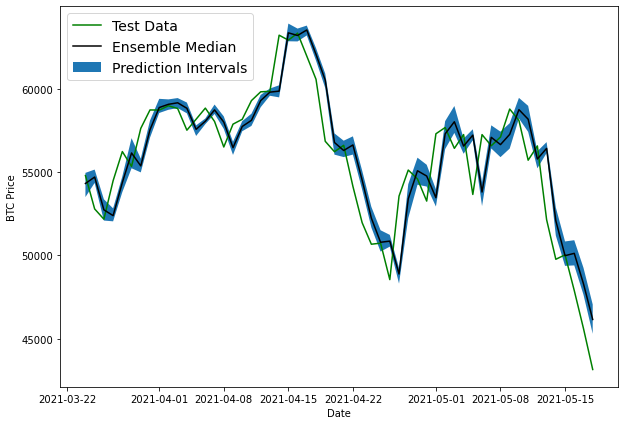

In [132]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

In [133]:
# the lagging behind indicates overfitting

In [134]:
# fit all history data to predict the future
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [135]:
# train on entire data and predict on the next day
X_all = bitcoin_prices_windowed.drop(['Price', 'block_reward'], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [136]:
# 1. turn X and y into tensor datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. batch and prefetch
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [137]:
# model
tf.random.set_seed(42)

model_9 = Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
])

# compile
model_9.compile(
    loss='mae',
    optimizer=Adam()
)

# fit
model_9.fit(
    dataset_all,
    epochs=100,
    verbose=0
    )

2022-01-07 16:36:34.109392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [138]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [139]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [140]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

2022-01-07 16:41:58.225951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55229.75390625

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55229.75390625] -> Prediction: 50430.53125

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55229.75390625 50430.53125   ] -> Prediction: 50434.63671875

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55229.75390625 50430.53125    50434.63671875] -> Prediction: 46537.35546875

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55229.75390625
 50430.53125    50434.63671875 46537.35546875] -> Prediction: 48285.53515625

Predicting on: 
 [45604.61575361 43144.47129086 55229.75390625 50430.53125
 50434.63671875 46537.35546875 48285.53515625] -> Prediction: 44468.19140625

Predicting on: 
 [43144.47129086 55229.75390625 50430.53125    50434.6

In [141]:
future_forecast[:10]

[55229.754,
 50430.53,
 50434.637,
 46537.355,
 48285.535,
 44468.19,
 49571.973,
 52311.918,
 50789.3,
 47570.938]

In [142]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [143]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [144]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [145]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55229.754, 50430.53 , 50434.637, 46537.355, 48285.535,
        44468.19 , 49571.973, 52311.918, 50789.3  , 47570.938, 47016.504,
        47085.863, 47405.965, 50824.984], dtype=float32))

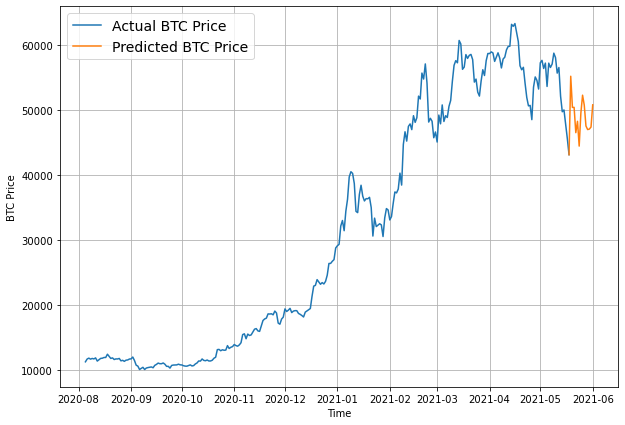

In [146]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")